# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
pip install citipy

Note: you may need to restart the kernel to use updated packages.


In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import os
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy
weather_api_key

'a145ba67a5ceb1aaf885ba973dad284d'

### Generate the Cities List by Using the `citipy` Library

In [3]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 597


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [9]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = url + "&q=" + city.replace(" ","+")
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | anadyr
Processing Record 2 of Set 1 | vilyuchinsk
Processing Record 3 of Set 1 | badger
Processing Record 4 of Set 1 | college
Processing Record 5 of Set 1 | port-aux-francais
Processing Record 6 of Set 1 | callao
Processing Record 7 of Set 1 | wailua homesteads
Processing Record 8 of Set 1 | yugorsk
Processing Record 9 of Set 1 | blackmans bay
Processing Record 10 of Set 1 | port mathurin
Processing Record 11 of Set 1 | inirida
Processing Record 12 of Set 1 | ballarat east
Processing Record 13 of Set 1 | adamstown
Processing Record 14 of Set 1 | waitangi
Processing Record 15 of Set 1 | ushuaia
Processing Record 16 of Set 1 | puerto ayora
Processing Record 17 of Set 1 | grytviken
Processing Record 18 of Set 1 | bamboo flat
Processing Record 19 of Set 1 | taiohae
City not found. Skipping...
Processing Record 20 of Set 1 | shalqar
Processing Record 21 of Set 1 | piti village
Processing Record 22 of

Processing Record 41 of Set 4 | hirara
Processing Record 42 of Set 4 | argostolion
Processing Record 43 of Set 4 | avarua
Processing Record 44 of Set 4 | north nowra
Processing Record 45 of Set 4 | mayskiy
Processing Record 46 of Set 4 | tsiombe
Processing Record 47 of Set 4 | daru
Processing Record 48 of Set 4 | kasongo
Processing Record 49 of Set 4 | sishilichengzi
City not found. Skipping...
Processing Record 0 of Set 5 | st. paul
Processing Record 1 of Set 5 | tiksi
Processing Record 2 of Set 5 | dakhla
Processing Record 3 of Set 5 | selfoss
Processing Record 4 of Set 5 | afaahiti
Processing Record 5 of Set 5 | caleta de carquin
Processing Record 6 of Set 5 | blacksburg
Processing Record 7 of Set 5 | minas de marcona
Processing Record 8 of Set 5 | mitsamiouli
Processing Record 9 of Set 5 | kyshtovka
Processing Record 10 of Set 5 | fale old settlement
Processing Record 11 of Set 5 | hami
Processing Record 12 of Set 5 | port lincoln
Processing Record 13 of Set 5 | grand falls-windsor

Processing Record 30 of Set 8 | la peca
Processing Record 31 of Set 8 | ola
Processing Record 32 of Set 8 | guantanamo
Processing Record 33 of Set 8 | midelt
Processing Record 34 of Set 8 | at taraf
Processing Record 35 of Set 8 | severo-yeniseyskiy
Processing Record 36 of Set 8 | remire-montjoly
Processing Record 37 of Set 8 | conde
Processing Record 38 of Set 8 | neryungri
Processing Record 39 of Set 8 | lyman
Processing Record 40 of Set 8 | kostomuksha
Processing Record 41 of Set 8 | al jawf
Processing Record 42 of Set 8 | chinchani
Processing Record 43 of Set 8 | gulf shores
Processing Record 44 of Set 8 | mahalapye
Processing Record 45 of Set 8 | lethem
Processing Record 46 of Set 8 | port blair
Processing Record 47 of Set 8 | viedma
Processing Record 48 of Set 8 | mtwara
Processing Record 49 of Set 8 | port alfred
Processing Record 0 of Set 9 | kismayo
Processing Record 1 of Set 9 | ryotsu-minato
Processing Record 2 of Set 9 | ghat
Processing Record 3 of Set 9 | tindouf
Processin

Processing Record 18 of Set 12 | dhuusamarreeb
Processing Record 19 of Set 12 | pauini
Processing Record 20 of Set 12 | ruokolahti
Processing Record 21 of Set 12 | caconda
Processing Record 22 of Set 12 | suntar
Processing Record 23 of Set 12 | albertina
Processing Record 24 of Set 12 | spinazzola
Processing Record 25 of Set 12 | baker city
Processing Record 26 of Set 12 | lakatoro
Processing Record 27 of Set 12 | malmslatt
Processing Record 28 of Set 12 | saacow
Processing Record 29 of Set 12 | quellon
Processing Record 30 of Set 12 | wynyard
Processing Record 31 of Set 12 | tataouine
Processing Record 32 of Set 12 | mossel bay
Processing Record 33 of Set 12 | shangri-la
City not found. Skipping...
Processing Record 34 of Set 12 | grand-lahou
Processing Record 35 of Set 12 | dryden
Processing Record 36 of Set 12 | sao joaquim
Processing Record 37 of Set 12 | tamanrasset
Processing Record 38 of Set 12 | bryne
Processing Record 39 of Set 12 | lubango
Processing Record 40 of Set 12 | tuc

In [10]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          569
Lat           569
Lng           569
Max Temp      569
Humidity      569
Cloudiness    569
Wind Speed    569
Country       569
Date          569
dtype: int64

In [11]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,anadyr,64.7500,177.4833,28.90,74,20,6.71,RU,1681950320
1,vilyuchinsk,52.9306,158.4028,43.07,90,100,6.04,RU,1681950320
2,badger,64.8000,-147.5333,39.07,41,20,0.00,US,1681950321
3,college,64.8569,-147.8028,39.15,41,20,0.00,US,1681950248
4,port-aux-francais,-49.3500,70.2167,40.69,68,18,34.67,TF,1681950321


In [12]:
import os
os.makedirs("output_data", exist_ok=True)

In [13]:
# Export the City_Data into a csv
city_data_df.to_csv("cities.csv", index_label="City_ID")

In [14]:
# Read saved data
city_data_df = pd.read_csv("cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,anadyr,64.7500,177.4833,28.90,74,20,6.71,RU,1681950320
1,vilyuchinsk,52.9306,158.4028,43.07,90,100,6.04,RU,1681950320
2,badger,64.8000,-147.5333,39.07,41,20,0.00,US,1681950321
3,college,64.8569,-147.8028,39.15,41,20,0.00,US,1681950248
4,port-aux-francais,-49.3500,70.2167,40.69,68,18,34.67,TF,1681950321


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

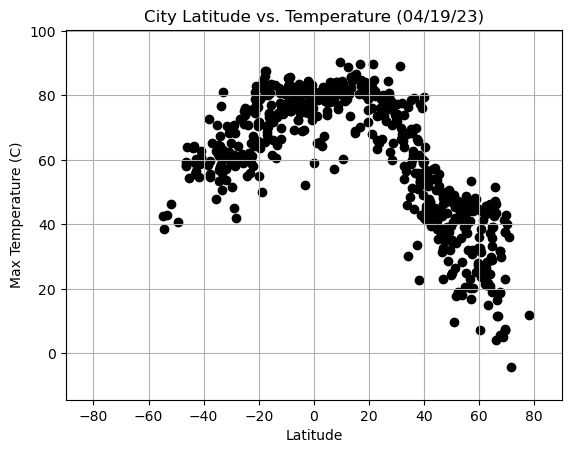

In [21]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df["Lat"], city_data_df["Max Temp"],  marker="o", label="Cities", color = "black")

# Incorporate the other graph properties
plt.title("City Latitude vs. Temperature (%s)" % time.strftime("%x"))
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (C)")
plt.grid(True)
plt.xlim(-90, 90)
plt.ylim(min(city_data_df["Max Temp"])-10, max(city_data_df["Max Temp"])+10)

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

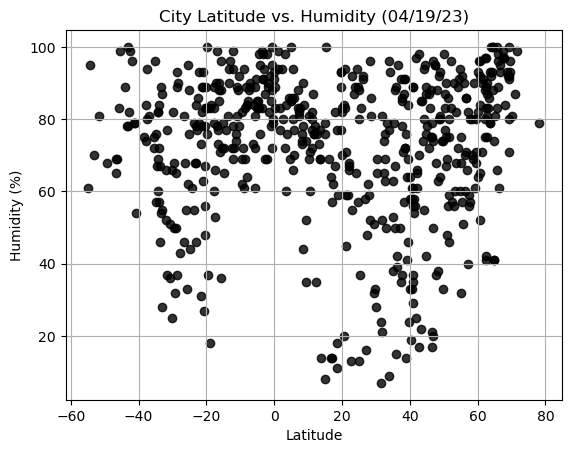

In [22]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df["Lat"], city_data_df["Humidity"],  marker="o", alpha=0.8, label="Cities", color = 'black')


# Incorporate the other graph properties
plt.title("City Latitude vs. Humidity (%s)" % time.strftime("%x"))
plt.xlabel("Latitude")
plt.ylabel("Humidity(%)")
plt.grid(True)
# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

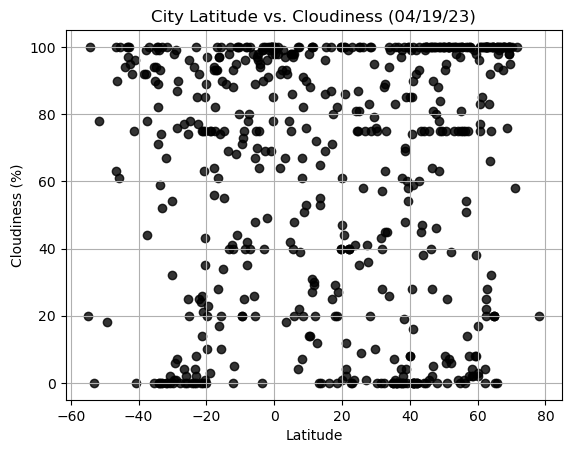

In [23]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(city_data_df["Lat"], city_data_df["Cloudiness"],color="black", marker="o", alpha=0.8, label="Cities")

# Incorporate the other graph properties
plt.title("City Latitude vs. Cloudiness (%s)" % time.strftime("%x"))
plt.xlabel("Latittude")
plt.ylabel("Cloudiness(%)")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

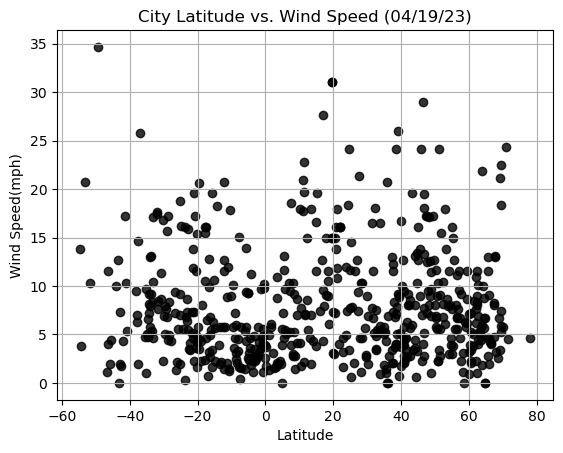

In [26]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(city_data_df["Lat"], city_data_df["Wind Speed"], color="black", marker="o", alpha=0.8, label="Cities")

# Incorporate the other graph properties
plt.title("City Latitude vs. Wind Speed (%s)" % time.strftime("%x"))
plt.ylabel("Wind Speed(mph)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [27]:
# Define a function to create Linear Regression plots
def plot_linear_regression(x_values, y_values, title, xlabel, ylabel, text_coordinates):
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    line_eq = f"y = {round(slope,2)}x + {round(intercept,2)}"
    
    plt.scatter(x_values, y_values)
    plt.plot(x_values, regress_values, "r-")
    
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.title(title)
    
    print(f"The r-squared is: {rvalue**2}")

In [46]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df[city_data_df["Lat"] >= 0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,anadyr,64.7500,177.4833,28.90,74,20,6.71,RU,1681950320
1,vilyuchinsk,52.9306,158.4028,43.07,90,100,6.04,RU,1681950320
2,badger,64.8000,-147.5333,39.07,41,20,0.00,US,1681950321
3,college,64.8569,-147.8028,39.15,41,20,0.00,US,1681950248
6,wailua homesteads,22.0669,-159.3780,79.75,66,40,16.11,US,1681950322


In [47]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df[city_data_df["Lat"] <= 0]


# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
4,port-aux-francais,-49.3500,70.2167,40.69,68,18,34.67,TF,1681950321
5,callao,-12.0667,-77.1500,76.71,69,0,20.71,PE,1681950321
8,blackmans bay,-43.0167,147.3167,59.13,78,97,7.36,AU,1681950323
9,port mathurin,-19.6833,63.4167,78.84,76,10,20.60,MU,1681950323
11,ballarat east,-37.5592,143.8744,55.60,80,44,1.99,AU,1681950324


###  Temperature vs. Latitude Linear Regression Plot

In [48]:
from scipy.stats import linregress

The r-squared is: 0.750129571049783


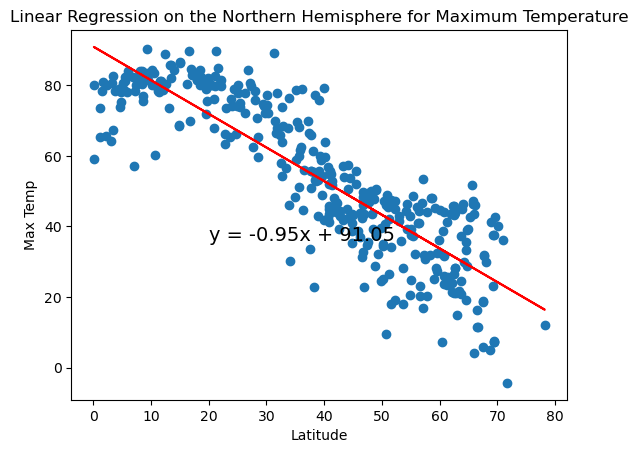

In [49]:
# Linear regression on Northern Hemisphere
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):
    
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    
    regress_values = x_values * slope + intercept    
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    
    plt.scatter(x_values, y_values)
    plt.plot(x_values, regress_values, "r-")
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")

    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.title(title)
    plt.annotate(line_eq,(20,36), fontsize=14)

    
    print(f"The r-squared is: {rvalue**2}")
    plt.show()

plot_linear_regression(northern_hemi_df["Lat"], northern_hemi_df["Max Temp"], "Linear Regression on the Northern Hemisphere for Maximum Temperature", "Max Temp", (0, -30))

The r-squared is: 0.525448847010182


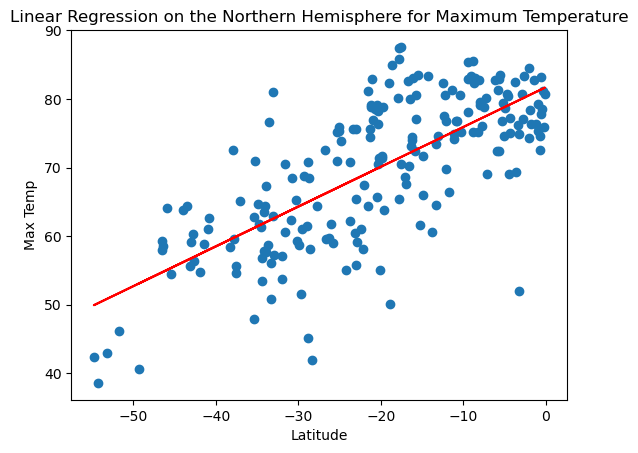

In [52]:
# Linear regression on Southern Hemisphere
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):
    
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept    
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    
    plt.scatter(x_values, y_values)
    plt.plot(x_values, regress_values, "r-")
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")

    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.title(title)
    plt.annotate(line_eq,(20,36), fontsize=14)
    print(f"The r-squared is: {rvalue**2}")
    plt.show()

plot_linear_regression(southern_hemi_df["Lat"], southern_hemi_df["Max Temp"], "Linear Regression on the Northern Hemisphere for Maximum Temperature", "Max Temp", (0, -30))

**Discussion about the linear relationship:** Both graphs have nearly polar opposite regression lines. The Northern graph shows that as the latitude increases, the temprature decreases. The opposite can be stated for the Southern Hemisphere, where, as the Latitude increases, so does the Max temp.

### Humidity vs. Latitude Linear Regression Plot

The r-squared is: 0.020205557924760063


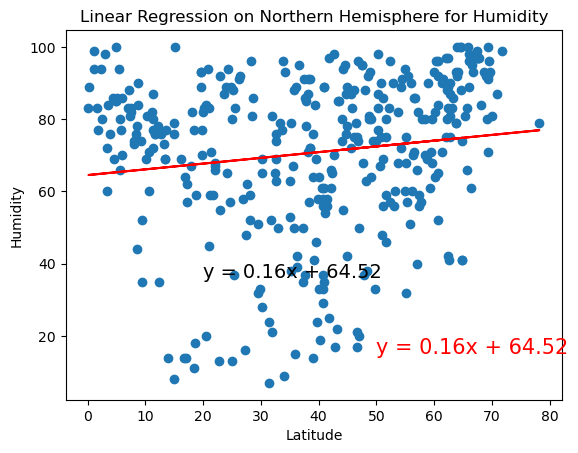

In [53]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]

plot_linear_regression(x_values, y_values, "Linear Regression on Northern Hemisphere for Humidity", "Humidity", (50,15))

The r-squared is: 0.06546699747541414


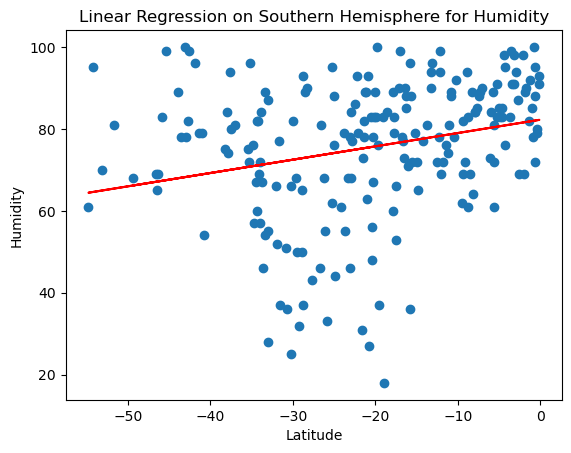

In [54]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]

plot_linear_regression(x_values, y_values, "Linear Regression on Southern Hemisphere for Humidity", "Humidity", (50,15))

**Discussion about the linear relationship:** Humidity and Location do not have the strongest relationship according to these graphs. 

### Cloudiness vs. Latitude Linear Regression Plot

The r-squared is: 0.01087503881747564


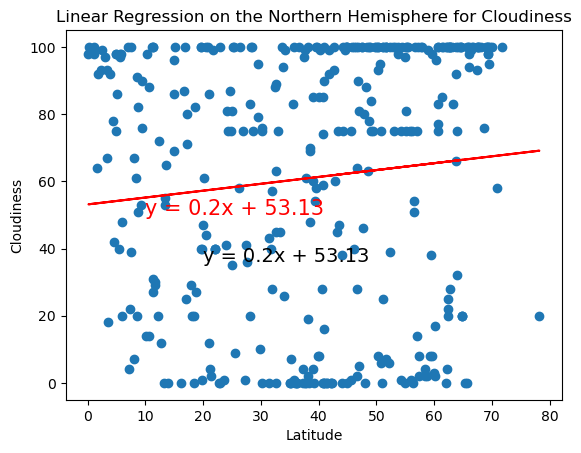

In [55]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]

plot_linear_regression(x_values, y_values,'Linear Regression on the Northern Hemisphere for Cloudiness','Cloudiness', (10,50))

The r-squared is: 0.019286061312551242


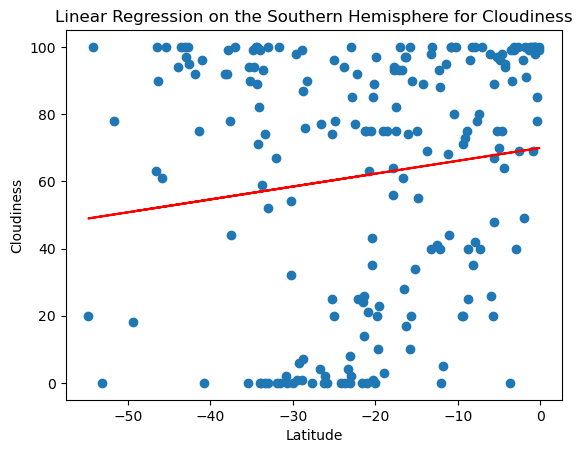

In [56]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]

plot_linear_regression(x_values, y_values,'Linear Regression on the Southern Hemisphere for Cloudiness','Cloudiness', (10,50))

**Discussion about the linear relationship:** The Northern and SOuthern Hemisphere seem to have no relationship between latitude and Cloudiness.

### Wind Speed vs. Latitude Linear Regression Plot

The r-squared is: 0.00223264006576757


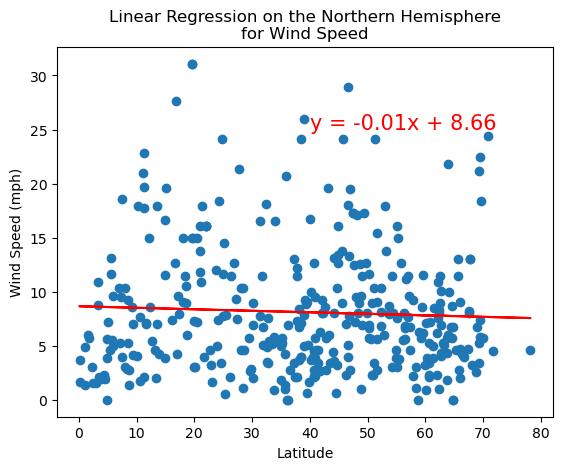

In [57]:
# Northern Hemisphere
northern_hemi_df = city_data_df[city_data_df["Lat"] >= 0]

plot_linear_regression(northern_hemi_df["Lat"], northern_hemi_df["Wind Speed"], "Linear Regression on the Northern Hemisphere\nfor Wind Speed", "Wind Speed (mph)", (40,25))


The r-squared is: 0.07284381029586325


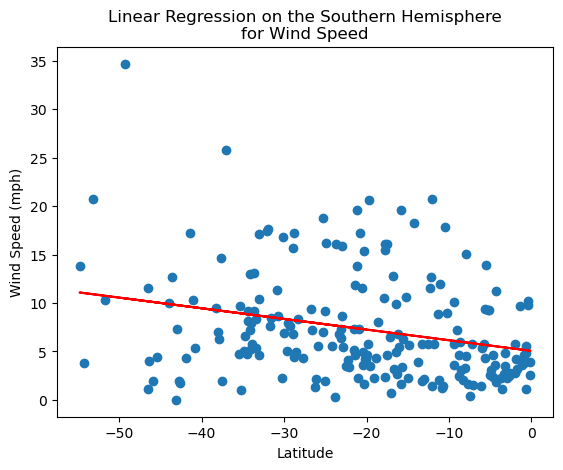

In [58]:
# Southern Hemisphere
southern_hemi_df = city_data_df[city_data_df["Lat"] <= 0]

plot_linear_regression(southern_hemi_df["Lat"], southern_hemi_df["Wind Speed"], "Linear Regression on the Southern Hemisphere\nfor Wind Speed", "Wind Speed (mph)", (40,25))


**Discussion about the linear relationship:** The Southern Hemispehere certainly seems to have a stronger relationship between latitude and Wind speed. The same can not be said, however, about the northern Hemispehere. There seems to be no relation between Wind SPeen and Latitude in the Northern Hemisphere.  